# Центральная предельная теорема своими руками

## Полукруговое распределение Вигнера

Выбранное распределение - **Полукруговое распределение Вигнера** - абсолютно непрерывное распределение вероятностей на прямой, график плотности которого получается после нормировки из полукруга, построенном на отрезке [-R,R] как на диаметре (тем самым, на самом деле график плотности оказывается полу-эллипсом).

Информация о распределении:
 - [русская Википедия](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%83%D0%BA%D1%80%D1%83%D0%B3%D0%BE%D0%B2%D0%BE%D0%B9_%D0%B7%D0%B0%D0%BA%D0%BE%D0%BD_%D0%92%D0%B8%D0%B3%D0%BD%D0%B5%D1%80%D0%B0)
 - [английская Википедия](https://en.wikipedia.org/wiki/Wigner_semicircle_distribution)


Основные характеристики распределения:
 - Параметр: радиус $R>0$
 - $x \in [-R,\, R]$
 - Плотность: $ f(x) = \dfrac{2}{\pi R^2} \sqrt{R^2- x^2} $
 - Функция распределения: $ F(x) = \dfrac{1}{2} + \dfrac{x \sqrt{R^2- x^2}}{\pi R^2} + \dfrac{\arcsin(\frac{x}{R})}{\pi}  $
 - Математическое ожидание: $ EX = 0 $
 - Дисперсия: $ DX = \dfrac{R^2}{4} $

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Зададим несколько случайных величин:
 * при $R = 1$
 * при $R = 2$
 * при $R = 3$
 * при $R = 0.5$

In [37]:
rv1 = sts.semicircular(scale = 1)
rv2 = sts.semicircular(scale = 2)
rv3 = sts.semicircular(scale = 3)
rv05 = sts.semicircular(scale = 0.5)

Из каждой сгенерируем выборку объёма 1000:

In [38]:
sample1 = rv1.rvs(1000)
sample2 = rv2.rvs(1000)
sample3 = rv3.rvs(1000)
sample05 = rv05.rvs(1000)

Построим гистограмму каждой выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины:

$ R= 1$

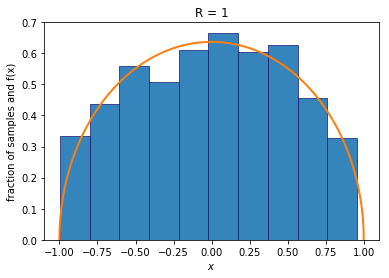

In [39]:
plt.hist(sample1, normed=True, edgecolor='midnightblue', linewidth=0.8, alpha = 0.9)

x = np.linspace(-1,1,1000)
plt.plot(x, rv1.pdf(x), linewidth=2)

plt.title("R = 1")
plt.ylabel('fraction of samples and f(x)')
plt.xlabel('$x$')


$ R= 2$

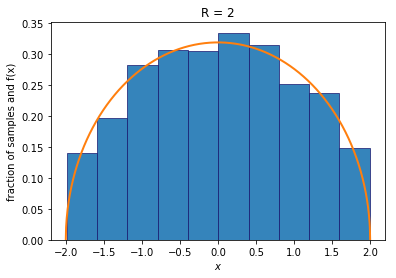

In [40]:
plt.hist(sample2, normed=True, edgecolor='midnightblue', linewidth=0.8, alpha = 0.9)

x = np.linspace(-2,2,1000)
plt.plot(x, rv2.pdf(x), linewidth=2)

plt.title("R = 2")
plt.ylabel('fraction of samples and f(x)')
plt.xlabel('$x$')


$ R = 3 $

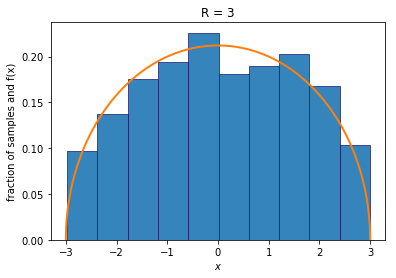

In [41]:
plt.hist(sample3, normed=True, edgecolor='midnightblue', linewidth=0.8, alpha = 0.9)

x = np.linspace(-3,3,1000)
plt.plot(x, rv3.pdf(x), linewidth=2)

plt.title("R = 3")
plt.ylabel('fraction of samples and f(x)')
plt.xlabel('$x$')

$ R = 0.5 $

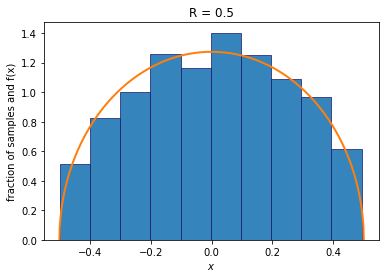

In [42]:
plt.hist(sample05, normed=True, edgecolor='midnightblue', linewidth=0.8, alpha = 0.9)

x = np.linspace(-0.5,0.5,1000)
plt.plot(x, rv05.pdf(x), linewidth=2)

plt.title("R = 0.5")
plt.ylabel('fraction of samples and f(x)')
plt.xlabel('$x$')

**Наблюдение:** кажется, что результаты особо не отличаются. Но всё дело в масштабе. Если изобразить всё ещё раз, но на одном графике, будет видно, как параметр влияет на форму плотности распределения:

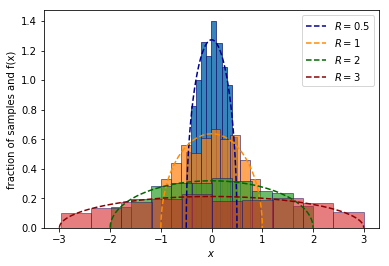

In [81]:
plt.hist(sample05, normed=True, edgecolor='midnightblue', linewidth=0.8, alpha = 0.9)
plt.hist(sample1, normed=True, edgecolor='midnightblue', linewidth=0.8, alpha = 0.7)
plt.hist(sample2, normed=True, edgecolor='midnightblue', linewidth=0.8, alpha = 0.7)
plt.hist(sample3, normed=True, edgecolor='midnightblue', linewidth=0.8, alpha = 0.6)


x1 = np.linspace(-1,1,1000)
x2 = np.linspace(-2,2,1000)
x3 = np.linspace(-3, 3,1000)
x05 = np.linspace(-0.5,0.5,1000)

plt.plot(x05, rv05.pdf(x05), '--', color = 'darkblue', label="$R = 0.5$")
plt.plot(x1, rv1.pdf(x1), '--', color = 'darkorange', label="$R = 1$")
plt.plot(x2, rv2.pdf(x2), '--', color = 'darkgreen', label="$R = 2$" )
plt.plot(x3, rv3.pdf(x3), '--', color = 'darkred', label="$R = 3$")

plt.legend()

plt.ylabel('fraction of samples and f(x)')
plt.xlabel('$x$')

Поняли, на что влияет $R$. Для дальнейшего исследования зафиксируем параметр $R=1$. Итак, исследуем следующую случайную величину:

In [69]:
rv = sts.semicircular(scale = 1)

**Задача — оценить распределение выборочного среднего случайной величины при разных объёмах выборок.**

Для этого при $n= 2, \, 10, \, 50$  сгенерируем 1000 выборок объёма n:

In [143]:
N = (2, 10, 70) # кортеж значений n
m = 1000 # количество выборок
samples = {} # словарь, в котором будем хранить пары:  n <--> список из m выборок объёма n
for n in N:
    samples[n] = []
    for i in range(m):
        samples[n].append(rv.rvs(n)) 

Для каждой выборки найдём выборочное среднее:

In [144]:
means = {} # словарь, в котором будем хранить пары:  n <--> список выборочных средних соответствующих выборок (объёма n)
for n in N:
    means[n] = []
    for i in range(m):
        means[n].append(np.mean(samples[n][i])) 

Для каждого n строим гистограмму распределения выборочных средних.

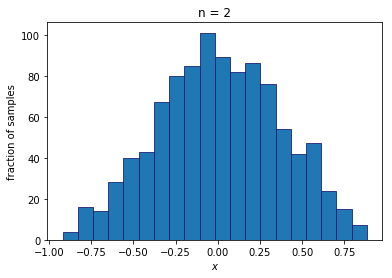

In [145]:
plt.hist(means[2],20, edgecolor='midnightblue', linewidth=0.8)

plt.title("n = 2")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

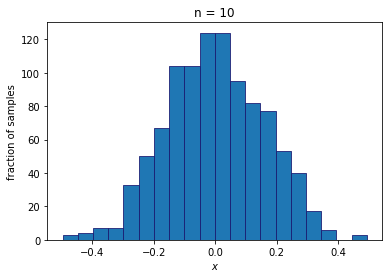

In [146]:
plt.hist(means[10],20, edgecolor='midnightblue', linewidth=0.8)

plt.title("n = 10")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

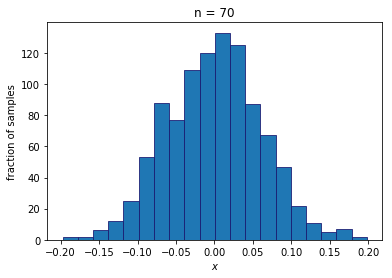

In [151]:
plt.hist(means[70],20, edgecolor='midnightblue', linewidth=0.8)

plt.title("n = 70")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Теоретические мат.ожидание и дисперсию случайной величины:

$EX = 0$

$DX = \dfrac{R^2}{4} = \dfrac{1}{4} = 0.25$

In [117]:
E = 0
D = 0.25

Согласно ЦПТ, распределение выборочных средних должно достаточно хорошо описываться нормальным распределением, т.е. $ \overline{X}_{n} \approx \sim N (EX, \, \frac{DX}{n})$, что при вычисленных параметрах соответствует $N (0, \, \frac{0.25}{n})$

 Поверх каждой гистограммы построим плотность соответствующего нормального распределения.

In [152]:
def showCLT(n):
    plt.hist(means[n],20, normed=True, edgecolor='midnightblue', linewidth=0.8)
    norm_rv = sts.norm(loc=E, scale=(D/n)**0.5)
    x = np.linspace(-1,1,100)
    plt.plot(x, norm_rv.pdf(x), linewidth = 2)

    plt.title("n = "+str(n))
    plt.ylabel('fraction of samples and f(x)')
    plt.xlabel('$x$')

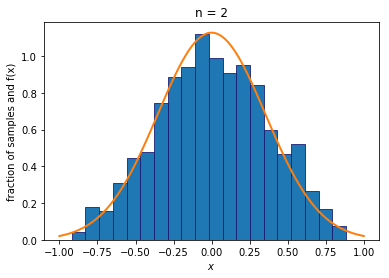

In [153]:
showCLT(2)

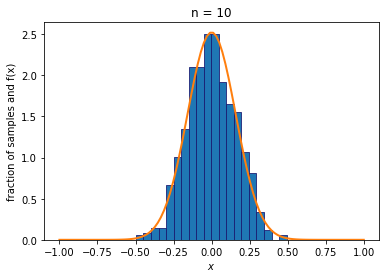

In [154]:
showCLT(10)

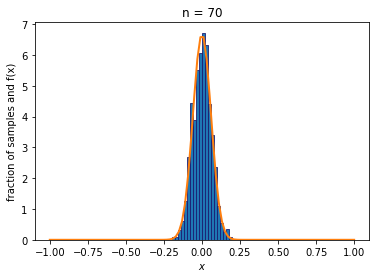

In [155]:
showCLT(70)

**ВЫВОД:** с роостом $n$ точность аппроксимации увеличивается - распределение всё больше сглаживается и становится всё больше похожим на нормальное. Гистограмма становится уже, значения всё сильнее концентрируются вокруг нуля. 